In [ ]:
# https://github.com/histolab/histolab
# pip install histolab

In [1]:
import openslide
import histolab # eorr using sudo yum install python-openslide
from histolab.data import prostate_tissue, ovarian_tissue

# download the public tissues
# prostate_svs, prostate_path = prostate_tissue()
# ovarian_svs, ovarian_path = ovarian_tissue()

In [2]:
# Slide initialization
from histolab.slide import Slide

import os

BASE_PATH = os.getcwd()

ovarian_path = os.path.join(BASE_PATH, 'tcga', 'TCGA-13-1404-01A-01-TS1.cecf7044-1d29-4d14-b137-821f8d48881e.svs')
prostate_path = os.path.join(BASE_PATH, 'tcga', 'TCGA-CH-5753-01A-01-BS1.4311c533-f9c1-4c6f-8b10-922daa3c2e3e.svs')

PROCESS_PATH_PROSTATE = os.path.join(BASE_PATH, 'prostate', 'processed')
PROCESS_PATH_OVARIAN = os.path.join(BASE_PATH, 'ovarian', 'processed')

prostate_slide = Slide(prostate_path, processed_path=PROCESS_PATH_PROSTATE)
ovarian_slide = Slide(ovarian_path, processed_path=PROCESS_PATH_OVARIAN)

In [3]:
print(f"Slide name: {prostate_slide.name}")
print(f"Levels: {prostate_slide.levels}")
print(f"Dimensions at level 0: {prostate_slide.dimensions}")
print(f"Dimensions at level 1: {prostate_slide.level_dimensions(level=1)}")
print(f"Dimensions at level 2: {prostate_slide.level_dimensions(level=2)}")

Slide name: TCGA-CH-5753-01A-01-BS1.4311c533-f9c1-4c6f-8b10-922daa3c2e3e
Levels: [0, 1, 2]
Dimensions at level 0: (16000, 15316)
Dimensions at level 1: (4000, 3829)
Dimensions at level 2: (2000, 1914)


In [4]:
print(f"Slide name: {ovarian_slide.name}")
print(f"Levels: {ovarian_slide.levels}")
print(f"Dimensions at level 0: {ovarian_slide.dimensions}")
print(f"Dimensions at level 1: {ovarian_slide.level_dimensions(level=1)}")
print(f"Dimensions at level 2: {ovarian_slide.level_dimensions(level=2)}")

Slide name: TCGA-13-1404-01A-01-TS1.cecf7044-1d29-4d14-b137-821f8d48881e
Levels: [0, 1, 2]
Dimensions at level 0: (30001, 33987)
Dimensions at level 1: (7500, 8496)
Dimensions at level 2: (1875, 2124)


In [6]:
# Show the native magnification factor and the magnification factor of different levels of a slide
print(
    "Native magnification factor:",
    prostate_slide.level_magnification_factor()
)

print(
    "Magnification factor corresponding to level 2:",
    prostate_slide.level_magnification_factor(level=2),
)

Native magnification factor: 20.0X
Magnification factor corresponding to level 2: 2.5X


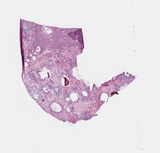

In [27]:
prostate_slide.thumbnail

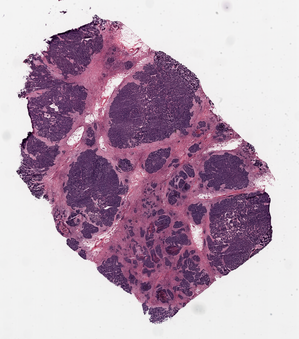

In [26]:
ovarian_slide.thumbnail

# Random Extraction

In [17]:
from histolab.tiler import RandomTiler
random_tiles_extractor = RandomTiler(
    tile_size=(128, 128),
    n_tiles=30,
    level=2,
    seed=42,
    check_tissue=True, # default
    tissue_percent=80.0, # default
    prefix="random/", # save tiles in the "random" subdirectory of slide's processed_path
    suffix=".png" # default
)

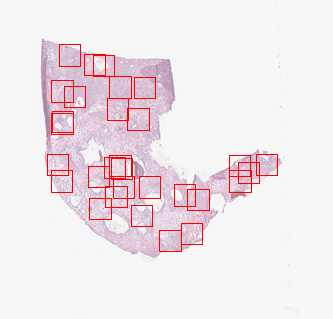

In [20]:
random_tiles_extractor.locate_tiles(
    slide=prostate_slide,
    scale_factor=48,  # default
    alpha=128,  # default
    outline="red",  # default
)

In [21]:
random_tiles_extractor.extract(prostate_slide)

# Grid Extraction

In [17]:
from histolab.tiler import GridTiler
grid_tiles_extractor = GridTiler(
   tile_size=(512, 512),
   level=1,
   check_tissue=True,
   pixel_overlap=0, # default
   prefix="grid_level2/", # save tiles in the "grid" subdirectory of slide's processed_path
   suffix=".png" # default
)

In [31]:
# visualize the selected tiles on a scaled version of the slide
grid_tiles_extractor.locate_tiles(
    slide=ovarian_slide,
    scale_factor=64,
    alpha=128,
    outline="red",
)

In [20]:
grid_tiles_extractor.extract(ovarian_slide)

In [103]:
# filename pattern:
# `{prefix}tile_{tiles_counter}_level{level}_{x_ul_wsi}-{y_ul_wsi}-{x_br_wsi}-{y_br_wsi}{suffix}`

import pandas as pd
import numpy as np

# Obtain all tile filenames
tiles_dir = "ovarian/processed/grid_level2/"
tiles_filenames = [
    f for f in os.listdir(tiles_dir) if os.path.splitext(f)[1] == ".png"
]
tiles_filenames_df = pd.DataFrame(
    {
        "tile_filename": tiles_filenames,
        f"tiles_counter": [f.split("_")[1] for f in tiles_filenames],
        f"level": [f.split("_")[2] for f in tiles_filenames],
        f"coordinate": [f.split("_")[3].rsplit('.',1)[0] for f in tiles_filenames],
        
    }
)

# Obtain the center coordinate of each tile
center_x = []
center_y = []
for f in tiles_filenames_df["coordinate"]:

    temp_center_x = np.mean([float(f.split("-")[0]),float(f.split("-")[2])])
    temp_center_y = np.mean([float(f.split("-")[1]),float(f.split("-")[3])])

    center_x.append(temp_center_x)
    center_y.append(temp_center_y)

tiles_filenames_df["center_x"] = center_x
tiles_filenames_df["center_y"] = center_y

tiles_filenames_df